<a href="https://colab.research.google.com/github/rhy004/Movie-Recommender-System/blob/main/Movie_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The Age of Recommender Systems**

---


The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and success.

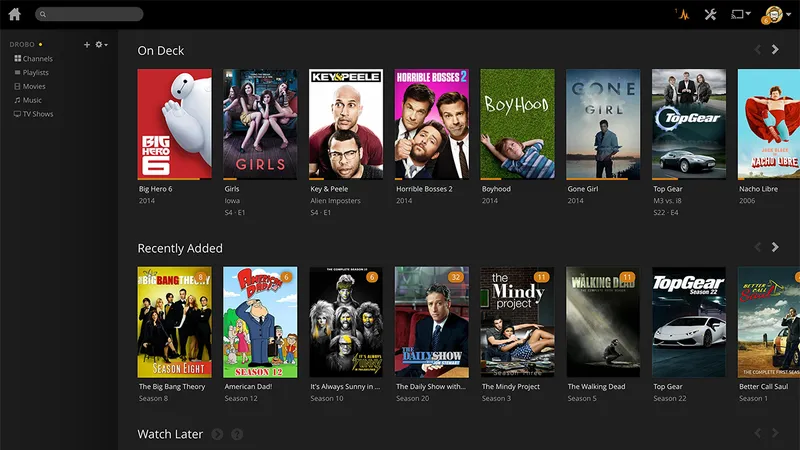

we are building a baseline Movie Recommendation System using TMDB 5000 Movie Dataset.

To Download Dataset:
[TMDB Dataset](https://drive.google.com/drive/folders/1_g58xvhgXs1UKy-Kwk6kl6_k4DdA_vBT?usp=sharing)

There are many types of recommender systems,we are trying to build a model for these 2 given below:-

1. Demographic Filtering- They **offer
generalized recommendations to every user**, based on movie popularity and/or genre. The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

2. Content Based Filtering- They **suggest similar items based on a particular item**. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.
3. Collaborative Filtering- This system **matches persons with similar interests and provides recommendations based on this matching**. Collaborative filters do not require item metadata like its content-based counterparts.


In [ ]:
import pandas as pd
import numpy as np
df1= pd.read_csv('/content/tmdb_5000_credits.csv')
df2= pd.read_csv('/content/tmdb_5000_movies.csv')


The first dataset contains the following features:-

* movie_id - A unique identifier for each
movie.
* cast - The name of lead and supporting actors.
* crew - The name of Director, Editor, Composer, Writer etc.


The second dataset has the following features:-

* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average - average ratings the movie recieved.
* vote_count - the count of votes recieved.

Let's join the two dataset on the 'id' column

In [ ]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# Demographic Filtering -

Before getting started with this -

we need a metric to score or rate movie
Calculate the score for every movie
Sort the scores and recommend the best rated movie to the users.
We can use the average ratings of the movie as the score but using this won't be fair enough since a movie with 8.9 average rating and only 3 votes cannot be considered better than the movie with 7.8 as as average rating but 40 votes. So, I'll be using IMDB's weighted rating (wr) which is given as :-

where,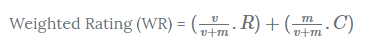

* v is the number of votes for the movie;
* m is the minimum votes required to be listed in the chart;
* R is the average rating of the movie; And
* C is the mean vote across the whole report

We already have v(vote_count) and R (vote_average) and C can be calculated as

In [ ]:
C= df2['vote_average'].mean()
C

6.096484531940539

So, the mean rating for all the movies is approx 6 on a scale of 10.The next step is to determine an appropriate value for m, the minimum votes required to be listed in the chart. We will use 90th percentile as our cutoff. In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [ ]:
m= df2['vote_count'].quantile(0.9)
m

1794.3000000000002

Now, we can filter out the movies that qualify for the chart

In [ ]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(498, 23)

We see that there are 481 movies which qualify to be in this list. Now, we need to calculate our metric for each qualified movie. To do this, we will define a function, weighted_rating() and define a new feature score, of which we'll calculate the value by applying this function to our DataFrame of qualified movies:

In [ ]:
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.068707
662,Fight Club,9413,8.3,7.947215
65,The Dark Knight,12002,8.2,7.926424
3232,Pulp Fiction,8428,8.3,7.913221
96,Inception,13752,8.1,7.868761
3438,The Godfather,5893,8.4,7.862334
3437,The Godfather,5893,8.4,7.862334
95,Interstellar,10867,8.1,7.816071
809,Forrest Gump,7927,8.2,7.811746
329,The Lord of the Rings: The Return of the King,8064,8.1,7.735342


Hurray! We have made our first(though very basic) recommender. Under the Trending Now tab of these systems we find movies that are very popular and they can just be obtained by sorting the dataset by the popularity column.

Text(0.5, 1.0, 'Popular Movies')

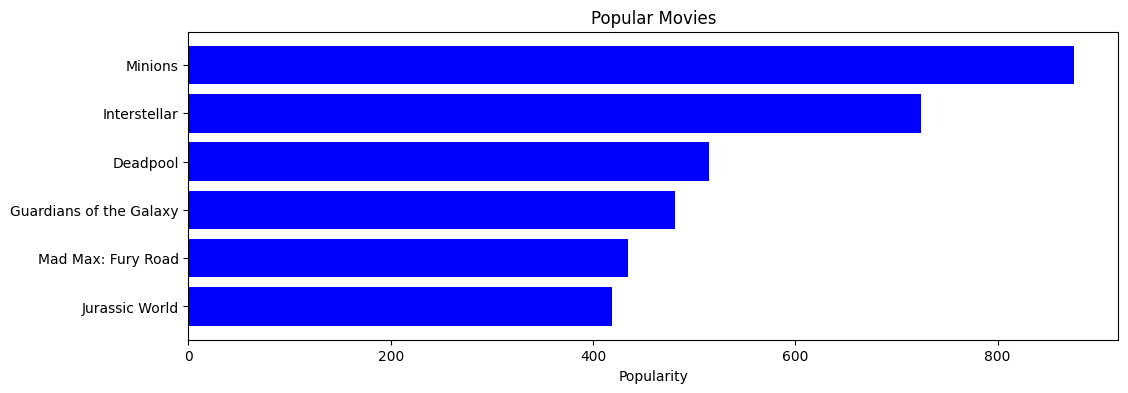

In [ ]:
pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='blue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

Now something to keep in mind is that these demographic recommender provide a general chart of recommended movies to all the users. They are not sensitive to the interests and tastes of a particular user. This is when we move on to a more refined system- Content Basesd Filtering.

# Content Based Filtering

In this recommender system the content of the movie (overview, cast, crew, keyword, etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.  

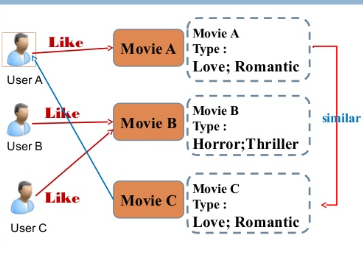

We going to use different methods for content based filtering

* using Term Frequency-Inverse Document Frequency (TF-IDF)
* using levenshtein distance


**Using Term Frequency-Inverse Document Frequency (TF-IDF)**

In [ ]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4978, 20978)

we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

We are going to define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies. Firstly, for this, we need a reverse mapping of movie titles and DataFrame indices.

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

steps:
* Get the index of the movie given its title.
* Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
* Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
* Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
* Return the titles corresponding to the indices of the top elements.

In [ ]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
4029    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [ ]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
3385              Thank You for Smoking
3386              Thank You for Smoking
4299                 This Thing of Ours
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1286                        Snowpiercer
Name: title, dtype: object

While our system has done a decent job of finding movies with similar plot descriptions, the quality of recommendations is not that great. "The Dark Knight Rises" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other Christopher Nolan movies. This is something that cannot be captured by the present system.

**Similarity and Levenshtein distance**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from fuzzywuzzy import fuzz
import distance
movies=pd.read_csv('tmdb_5000_movies.csv')
credits=pd.read_csv('tmdb_5000_credits.csv')

In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [ ]:
movies=movies.merge(credits,on='title')
movies=movies[['movie_id','title','overview','genres','keywords','cast','crew']]
movies.isnull().sum()#checking for missing values
movies.dropna(inplace=True)#dropping overview's those columns whose value is missing
movies.duplicated().sum()
movies.iloc[0]
movies.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
def convert(obj):
    L=[]
    for i in ast.literal_eval(obj):
        L.append( i['name'])
    return L

In [ ]:
import ast
ast.literal_eval('[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]')
movies['genres']=movies['genres'].apply(convert)
movies['keywords']=movies['keywords'].apply(convert)

In [ ]:
def convert3(obj):
    L=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter!=3:
            L.append( i['name'])
            counter+=1
        else:
            break
    return L


In [ ]:
movies['cast']=movies['cast'].apply(convert3)
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [ ]:
def fetch_director(obj):
    L=[]
    for i in ast.literal_eval(obj):
        if i['job']=='Director':
            L.append( i['name'])
            break
    return L

In [ ]:
movies['crew']=movies['crew'].apply(fetch_director)
movies['overview']=movies['overview'].apply(lambda x:x.split())#converts paragraph to list
movies['genres']=movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords']=movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']=movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']=movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])
movies['tags']=movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']
new_df=movies[['movie_id','title','tags']]
new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

<ipython-input-15-28ac741185d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:" ".join(x))
<ipython-input-15-28ac741185d0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [ ]:
new_df.head(5)

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


In [ ]:
cv=CountVectorizer(max_features=5000,stop_words='english')
vectors=cv.fit_transform(new_df['tags']).toarray()
feature_names = cv.get_feature_names_out()

In [ ]:
ps=PorterStemmer()#basically makes like likes and liked as like only
def stem(text):
    y=[]
    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [ ]:
new_df['tags']=new_df['tags'].apply(stem)
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vectors)

<ipython-input-19-3881e43601bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [ ]:
new_df_copy = new_df.copy()
def truncate_title(title):
    words = title.split()
    truncated_title = ' '.join(words[:3])
    return truncated_title

new_df_copy['title'] = new_df_copy['title'].apply(truncate_title)

In [ ]:
def recommend(movie):
    movie = movie.lower()  # Convert input to lowercase
    recommendations = set()  # Use a set to store unique recommendations

    for title in new_df_copy['title'].str.lower().values:  # Convert titles to lowercase for comparison
        similarity_score = fuzz.token_sort_ratio(movie, title)
        levenshtein_distance = distance.levenshtein(movie, title)
        if similarity_score > 85 or levenshtein_distance <2 :  # Adjust thresholds as needed
            movie_index = new_df_copy[new_df_copy['title'].str.lower() == title].index[0]  # Convert titles to lowercase for comparison
            distances = similarity[movie_index]
            movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:5]
            recommended_movies = [new_df.iloc[i[0]].title for i in movies_list]
            recommendations.update(recommended_movies)  # Update the set with unique recommendations

    return list(recommendations)

In [ ]:
recommend('Batman')

['The Dark Knight Rises', 'Batman & Robin', 'Batman', 'Batman Begins']

In [ ]:
recommend('Harry Potter')

['Harry Potter and the Chamber of Secrets',
 'Harry Potter and the Prisoner of Azkaban',
 'Harry Potter and the Goblet of Fire',
 'Harry Potter and the Order of the Phoenix']

# Collaborative Filtering
Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.
* **User based filtering**- These systems recommend products to a user that similar
users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.
* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity.

In [ ]:
import pandas as pd
movies = pd.read_csv("/content/movie.csv")
ratings = pd.read_csv("/content/rating.csv")

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [ ]:
df = pd.merge(movies, ratings, on="movieId")
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41


In [ ]:
movie_ratings_count = df.groupby('title')['rating'].count().reset_index()

In [ ]:
# Count Ratings for each and every movie
ratings = df.dropna(axis=0, subset = ['title'])    # Drop all 'NaN' values
movie_rating_Count = (ratings.groupby(by=['title'])['rating'].count().reset_index().
                     rename(columns = {'rating':'TotalRatingCount'})[['title', 'TotalRatingCount']])

movie_rating_Count.head(10)

,title,TotalRatingCount
0,$5 a Day (2008),1
1,'Hellboy': The Seeds of Creation (2004),3
2,'Neath the Arizona Skies (1934),1
3,'Round Midnight (1986),3
4,'Salem's Lot (2004),4
5,'Til There Was You (1997),24
6,"'burbs, The (1989)",78
7,'night Mother (1986),7
8,(500) Days of Summer (2009),132
9,(Untitled) (2009),1


In [ ]:
movie_rating_Count.describe()

,TotalRatingCount
count,12309.000000
mean,41.309286
std,111.803689
min,1.000000
25%,2.000000
50%,6.000000
75%,27.000000
max,1716.000000


In [ ]:
# Merging the rating counts with the ratings
ratings = ratings.merge(movie_rating_Count, left_on='title', right_on='title', how='left')
# left_on => on left dataframe which column considered, right_on => on right dataframe which column considered
ratings.head()

,movieId,title,genres,userId,rating,timestamp,TotalRatingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47,1262
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52,1262
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51,1262
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47,1262
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41,1262


<Axes: >

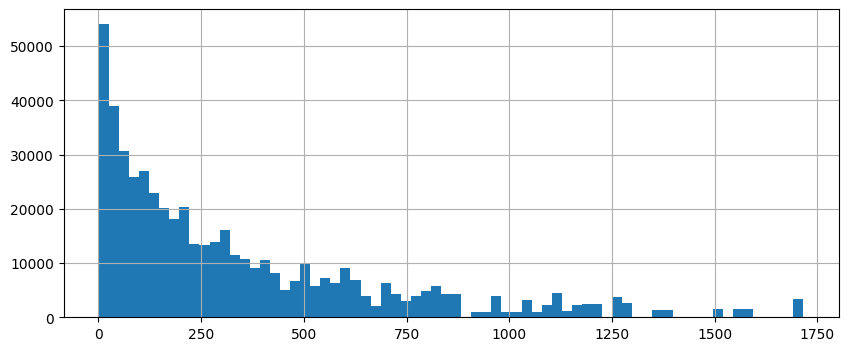

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
ratings['TotalRatingCount'].hist(bins=70)

In [ ]:
popularity_threshold = 1000
rating_popular_movie = ratings.query('TotalRatingCount >= @popularity_threshold')
rating_popular_movie.head()

,movieId,title,genres,userId,rating,timestamp,TotalRatingCount
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3,4.0,1999-12-11 13:36:47,1262
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,6,5.0,1997-03-13 17:50:52,1262
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,4.0,1996-06-05 13:37:51,1262
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,4.0,1999-11-25 02:44:47,1262
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.5,2009-01-02 01:13:41,1262


In [ ]:
rating_popular_movie.shape

(37288, 7)

In [ ]:
s = set(rating_popular_movie['title'])

In [ ]:
# Create a Pivot Table
features = rating_popular_movie.pivot_table(index='title', columns='userId', values='rating').fillna(0)
features.head()


userId,1,2,3,4,5,6,7,8,9,10,...,3420,3421,3422,3423,3424,3425,3426,3427,3428,3429
title,,,,,,,,,,,,,,,,,,,,,
Aladdin (1992),0.0,0.0,0.0,0.0,5.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,3.0,3.5,0.0,0.0,0.0,4.0,0.0
American Beauty (1999),0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,3.5,0.0,4.0,0.0,5.0,4.0
Apollo 13 (1995),0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,4.0,5.0,3.0,0.0,3.0,4.0,0.0,0.0
Back to the Future (1985),0.0,5.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
Batman (1989),0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,3.5,0.0,3.0,0.0,0.0,0.0


In [ ]:
# Convert the pivot_table into an array matrix
from scipy.sparse import csr_matrix
features_matrix = csr_matrix(features.values)    # All info of pivot table converted into an array
features_matrix

<322x10330 sparse matrix of type '<class 'numpy.float32'>'
	with 574052 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.neighbors import NearestNeighbors   # Not KNearestNeighbors, NearestNeighbors => Unsupervised Algo
model = NearestNeighbors(metric = "cosine", algorithm="brute")
model.fit(features_matrix)    # p=2 => Euclidean Distance Parameter

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
features.shape

(322, 10330)

In [ ]:
# Taking a new movie at random
query_index = np.random.choice(features.shape[0])    # Collect 1 record
print(query_index)

4


In [ ]:
# Find similar movies(nearer to the selected movie) using kneighbors
distances, indices = model.kneighbors(features.iloc[query_index,:].values.reshape(1, -1), n_neighbors=6)
# n_neighbors = 6 => will include the movie itself => We will be getting 5 other movie recommendations

In [ ]:
# distances = 0 => Same movie itself
distances

array([[0.        , 0.49089158, 0.52508205, 0.53091943, 0.5320972 ,
        0.5411382 ]], dtype=float32)

In [ ]:
indices

array([[  4,  32,  30, 184,   2, 156]])

In [ ]:
# Print top 5 movie name recommendations for movie along with the distances from original movie
for i in range(0, len(distances.flatten())):     # Convert 'distances' array into 1-D array
    if(i==0):
        print("Recommendations for {0}:\n".format(features.index[query_index]))    # 1st recommendation => same movie itself
    else:
        print("{0}: {1}, with distance of {2}:".format(i, features.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Addams Family Values (1993):

1: Batman Forever (1995), with distance of 0.49089157581329346:
2: Batman (1989), with distance of 0.5250820517539978:
3: Mask, The (1994), with distance of 0.5309194326400757:
4: Ace Ventura: Pet Detective (1994), with distance of 0.5320972204208374:
5: Interview with the Vampire: The Vampire Chronicles (1994), with distance of 0.5411381721496582:
